In [1]:
import pandas as pd
import random
from bisect import bisect_left
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('twist.txt',names=["sequence"])
ACGT = {'A':'0','C': '1', 'G':'2', 'T':'3'}

In [3]:
def encode(x):
    encoded = ''
    for letter in x:
        b4 = ACGT[letter]
        encoded+=b4
    return encoded

In [4]:
def regular_errors(seq,n,d):
    i = 0
    m = len(seq)//d
    if n==0:
        return seq
    while i< m:
        j=0
        while j<n:
            idx = random.choice(range(i*d,(i+1)*d))
            seq[idx]= random.choice(['0','1','2','3'])
            j+=1
        i+=1
    return seq

def create_list(seq_shifts):
    i = 0
    flat_list = []
    for sublist in seq_shifts:
        for item in sublist:
            flat_list.append((i,item))
            i+=1
    return flat_list

def vote_func(num, keys):
    idx = bisect_left(keys, num)
    if abs(keys[idx]-num) > abs(keys[idx+1]-num):
        idx =  idx+1
    loc = data[idx][0]
    seq = loc // 150
    shift = loc%150
    return seq, shift  

def vote(read_l, keys):
    votes = {}
    for num in read_l:
        seq, shift = vote_func(num, keys)
        if seq not in votes:
            votes[seq]=[shift]
        else:
            votes[seq].append(shift)
    return votes

In [5]:
df0['b4_sequence'] = [encode(x) for x in df0['sequence'] ]

for i in range(0,150):
    df0['shift{}'.format(i)] = [ int((x+x)[i:i+16],4) for x in df0.b4_sequence]

df0.to_csv('b4_encoded.csv',index=False)

In [6]:
df = pd.read_csv('b4_encoded.csv')  
df.head()

,sequence,b4_sequence,shift0,shift1,shift2,shift3,shift4,shift5,shift6,shift7,...,shift140,shift141,shift142,shift143,shift144,shift145,shift146,shift147,shift148,shift149
0,GCAACTGGTTGTGATTGCACGACTCTATGGTCAAACCTATTTATAA...,2100132233232033210120131303223100011303330300...,2423978895,1105980990,128956665,515826660,2063306641,3958259270,2948135192,3202606177,...,3744209159,2091934750,4072771706,3406184939,739837871,2959351486,3247471355,104983534,419934136,1679736547
1,AATGTACTCGCATATGGTAGCCATACGTTCGTGGGGTGCAATGCAC...,0032301312103032230211030123312322223210032101...,247948494,991793978,3967175915,2983801772,3345272498,496188105,1984752421,3644042388,...,3321241836,400065457,1600261831,2106080029,4129352822,3632509401,1645135716,2285575571,552367692,2209470771
2,AGAAATTTCGCAGTCATACCGGCGCGCTTAGCAGCACAATTGGCGC...,0200033312102310301122121213302102101003322121...,541025460,2164101843,66472780,265891121,1063564485,4254257942,4132129882,3643617641,...,2898846211,3005450255,3431866431,842563837,3370255350,596119513,2384478052,947977618,3791910475,2282740013
3,GCGTTCCTGCTGATAAAACGACTAAGCCGATTTCTCGAGTCTACCT...,2123311321320300001201300211203331312023130113...,2614599216,1868462272,3178881792,4125592577,3617468422,1584971800,2044919905,3884712327,...,3077720509,3720947445,1998887895,3700584286,1917435257,3374773735,614193054,2456772216,1237154275,653649804
4,GAAAGATCGCCTCTATTAACCTCAAAGACGCTTGCTCATTTCCAGG...,2000203121131303300113100020121332131033311022...,2156762995,37117391,148469564,593878256,2375513025,912117509,3648470039,1708978269,...,1465817096,1568301091,1978237069,3617980982,1587022041,2053120869,3917516183,2785162845,2550716791,1612932572


In [7]:
idx = random.choice(range(29040))
print(idx)

11380


In [8]:
df_shifted = df[['shift{}'.format(i) for i in range(150)]]
seq_shifts = df_shifted.values.tolist()
data = create_list(seq_shifts)
data.sort(key=lambda r: r[1])
keys = [r[1] for r in data]

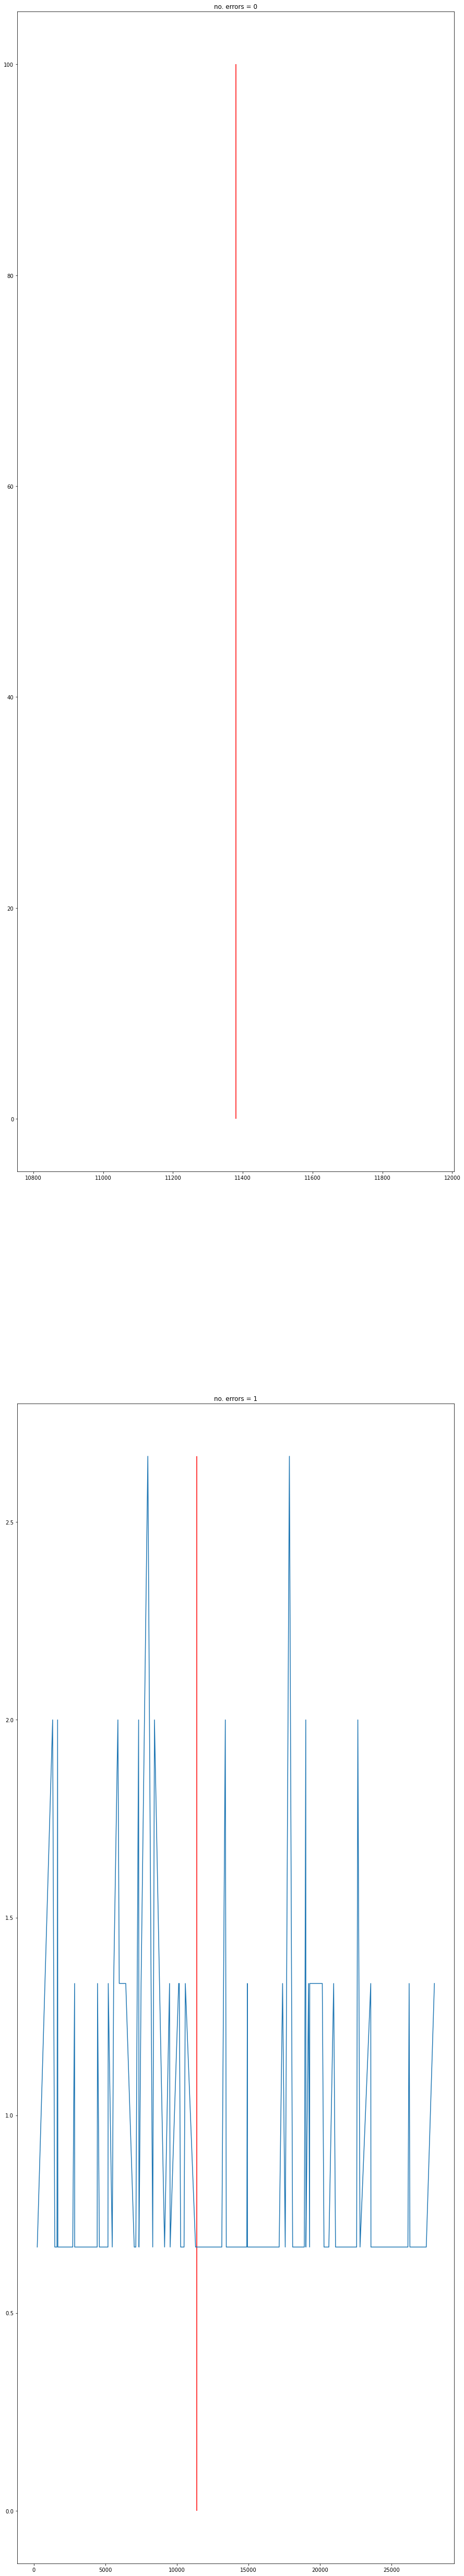

In [10]:
fig, ax = plt.subplots(2,figsize=(15,90))

for i in range(2):
    seq_raw = list(df['b4_sequence'].values[idx])
    read = ''.join(regular_errors(seq_raw,i,4))
    read_l = [int((read+read)[i:i+16],4) for i in range(0,150)]
    votes = vote(read_l, keys)
    x = sorted(list(votes.keys()))
    y = [(len(votes[key])/150)*100 for key in sorted(votes)]
    ax[i].plot(x, y)
    ax[i].vlines(idx,0,max(y),colors='r')
    ax[i].set_title('no. errors = {}'.format(i))